In [1]:
# **加载必要的模块**

# 基本模块：时间与路径
import os
import time
import string
# 数据读取与计算
import math
import pandas as pd
import numpy as np
# 绘图
import matplotlib.pyplot as plt
# 模型数据集划分
from sklearn.model_selection import train_test_split, KFold
# 模型流水线整合器
from sklearn.pipeline import Pipeline
# 模型数据预处理
from sklearn.preprocessing import PowerTransformer, StandardScaler, PolynomialFeatures
# 模型
from sklearn.linear_model import LassoCV
import xgboost as xgb
# 加载回归模型的评价指标
from sklearn.metrics import mean_absolute_error
# 保存模型模块
from sklearn.externals import joblib 
# 屏蔽warnings
import warnings
warnings.filterwarnings('ignore')

D:\Users\Surface\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
#读取脚本路径并打开文件
current_path = os.getcwd()
print(current_path)
data_path=os.path.join(current_path,'北京租房信息.csv')
df=pd.read_csv(open(data_path,encoding='GBK'))
df.head()


C:\Users\Surface\未命名\北京租金预测


,楼盘名称,租赁方式,户型,面积,朝向,房租,更新时间,采集时间,城市,区域,街道或片区,地段,地址,公交站,主图链接,楼盘详情链接,页面网址,标签
0,新出房源 能长租 南北通透二居 电梯房,整租,3室1厅,71㎡,朝南,8700元/月,NaN,2018-11-02 21:40:25,北京,朝阳,安贞,安华西里,朝阳-安贞-安华西里,距8号线安华桥站约795米，距安贞桥北公交站约633米,http://img.soufunimg.com/secondhouse/image/loa...,http://zu.fang.com/chuzu/3_418003424_1.htm,http://zu.fang.com/house-a01-b01121/,NaN
1,外馆西街 安华西里精装一居室 真实图片 随时看房 可长签,整租,1室1厅,50㎡,朝南,5600元/月,NaN,2018-11-02 21:40:25,北京,朝阳,安贞,安华西里,朝阳-安贞-安华西里,距8号线安华桥站约795米，距安贞桥北公交站约633米,http://img.soufunimg.com/secondhouse/image/loa...,http://zu.fang.com/chuzu/3_419296039_1.htm,http://zu.fang.com/house-a01-b01121/,周边配套齐/全装全配/首次出租
2,安贞安华里四区 南北通透两居室 心怡大厦 环球贸易 带客厅,整租,2室0厅,66㎡,朝南,6600元/月,NaN,2018-11-02 21:40:25,北京,朝阳,安贞,安华里,朝阳-安贞-安华里,距安贞桥北公交站约764米。,http://img.soufunimg.com/secondhouse/image/loa...,http://zu.fang.com/chuzu/3_419399560_1.htm,http://zu.fang.com/house-a01-b01121/,南北通透/采光好/周边配套齐
3,"胜古馨园小区,业主直租三室两卫,装修温馨,拎包入住",整租,3室1厅,145㎡,朝南,16000元/月,NaN,2018-11-02 21:40:25,北京,朝阳,安贞,胜古馨园,朝阳-安贞-胜古馨园,距5号线和平西桥站约552米，距安贞桥北公交站约651米,http://img.soufunimg.com/secondhouse/image/loa...,http://zu.fang.com/chuzu/3_419425499_1.htm,http://zu.fang.com/house-a01-b01121/,NaN
4,"视频看房,相寓新装一居室,安贞西里,安华西里,北土城,安华桥",整租,1室1厅,45㎡,朝南,5600元/月,NaN,2018-11-02 21:40:25,北京,朝阳,安贞,安贞西里,朝阳-安贞-安贞西里,距8号线安华桥站约324米，距安贞桥西公交站约558米,http://img.soufunimg.com/secondhouse/image/loa...,http://zu.fang.com/chuzu/3_417705334_1.htm,http://zu.fang.com/house-a01-b01121/,交通便利/周边配套齐/采光好


In [3]:
print(f'数据维度：{df.shape}\n')
print(f'数据类型:{df.dtypes}')

数据维度：(4245, 18)

数据类型:楼盘名称      object
租赁方式      object
户型        object
面积        object
朝向        object
房租        object
更新时间      object
采集时间      object
城市        object
区域        object
街道或片区     object
地段        object
地址        object
公交站       object
主图链接      object
楼盘详情链接    object
页面网址      object
标签        object
dtype: object


In [4]:
for var in ['租赁方式','户型','朝向']:
    print(f'<{var}分类的频数统计>:{df[var].value_counts()}\n')

<租赁方式分类的频数统计>:整租      3426
合租主卧     422
合租次卧     211
合租单间      48
整租㎡        2
Name: 租赁方式, dtype: int64

<户型分类的频数统计>:1室1厅    1034
2室1厅     936
3室2厅     473
2室2厅     346
3户合租     283
3室1厅     233
2户合租     209
4户合租     127
4室2厅     127
1室0厅      94
1室2厅      83
4室3厅      44
5户合租      37
5室2厅      27
6户合租      17
4室1厅      14
7户合租       8
2室0厅       7
5室3厅       5
3室3厅       2
3室0厅       2
6室2厅       1
Name: 户型, dtype: int64

<朝向分类的频数统计>:朝南    2929
朝东     588
朝北     331
朝西     259
Name: 朝向, dtype: int64



数据初探：结论
一、数据需要清洗
连续数值型变量租金、面积包含单位字符，导致数据类型为object
类别变量租赁方式的类别记录标准不一，部分类别中包含特殊字符
类别变量户型中的种类众多；记录方式不统一；部分记录中包含整租合租信息
类别变量朝向中朝南的样本比例非常高，可能属于方差近零特征
公交站字段中信息为文字描述，站点、距离信息需要提取
二、数据包含信息较少
数据中不包含房屋装修情况、房龄等区分房屋品质的变量
数据中相关区位的特征只有公交站、所在片区两个字段

In [5]:
#定于数据处理函数
def data_extract(df):
    df['area']=(df['面积'].str.replace('㎡','')).astype(float)
    df['total_price']=(df['房租'].str.replace('元/月','')).astype(float)
    df['rental_type']=df['租赁方式'].str.replace('m²','')
    #?P<value>的意思就是命名一个名字为value的组，匹配规则符合后面的/d+
    room_type = df['户型'].str.extract('(?P<room>\d+)室(?P<hall>\d+)厅')
    subway = df['公交站'].str.extract('距(?P<sub_line>\d+)号线(?P<sub_station>\w+)站约(?P<sub_dist>\d+)米')
    bus = df['公交站'].str.extract('距(?P<bus_station>\w+)公交站约(?P<bus_dist>\d+)米')
    #制作朝南哑变量
    df['is_nan']=df['朝向'].map(lambda x:1 if x=='朝南' else 0)
    #地址
    df['address'] = df['城市'] + '市' + df['区域'] + '区' + df['地段']
    #整合
    result = pd.concat([df[['total_price','area', 'is_nan', 'rental_type', 'address','区域']], room_type, subway,bus], axis=1)
    for var in [ 'room', 'hall','sub_dist','bus_dist']:
        result[var] = result[var].astype(float)
    return result

In [6]:
test_df = data_extract(df)
print(test_df.shape)
test_df.head(20)
test_df['bus_dist'].astype('float')

(4245, 13)


0       633.0
1       633.0
2       764.0
3       651.0
4       558.0
        ...  
4240    730.0
4241    730.0
4242    499.0
4243    730.0
4244    721.0
Name: bus_dist, Length: 4245, dtype: float64

将处理后的数据保持为csv格式

In [7]:
current_path=os.getcwd()
output_path = os.path.join(current_path,'processed_data.csv')
test_df.to_csv(output_path)

In [8]:
#查看数据缺失情况
test_df.isnull().sum()

total_price    136
area           140
is_nan           0
rental_type    136
address        136
区域               0
room           817
hall           817
sub_line       607
sub_station    607
sub_dist       607
bus_station    207
bus_dist       207
dtype: int64

In [9]:

data=test_df
data['selected'] = 1
for var in ['total_price','area','room','hall']:
    data.loc[data[var].isnull(),['selected']] = 0
data.loc[data['selected']==1,:].isnull().sum()




total_price      0
area             0
is_nan           0
rental_type      0
address          0
区域               0
room             0
hall             0
sub_line       407
sub_station    407
sub_dist       407
bus_station     62
bus_dist        62
selected         0
dtype: int64

In [10]:
# 数据缺失值处理：公交站
for var in ['sub_line','sub_station','bus_station']:
    data.loc[data[var].isnull(), [var]] = 'none'
# 根据距离地铁站最远距离定义缺失值填充值
longest_sub_dist = data.sub_dist.max()
longest_bus_dist = data.bus_dist.max()
print(longest_sub_dist)
print(longest_bus_dist)
data.loc[data['sub_dist'].isnull(), ['sub_dist']] = longest_sub_dist*100
data.loc[data['bus_dist'].isnull(), ['bus_dist']] = longest_bus_dist*100
data.loc[data['selected']==1,:].isnull().sum()


1188.0
991.0


total_price    0
area           0
is_nan         0
rental_type    0
address        0
区域             0
room           0
hall           0
sub_line       0
sub_station    0
sub_dist       0
bus_station    0
bus_dist       0
selected       0
dtype: int64

In [11]:
for var in ['is_nan','区域','rental_type']:
    print(f'<{var}>的分类别频数统计：\n{data[var].value_counts()}\n')

<is_nan>的分类别频数统计：
1    2929
0    1316
Name: is_nan, dtype: int64

<区域>的分类别频数统计：
朝阳    4245
Name: 区域, dtype: int64

<rental_type>的分类别频数统计：
整租      3426
合租主卧     422
合租次卧     211
合租单间      48
整租㎡        2
Name: rental_type, dtype: int64



根据三个类别变量的类别频数分布：

* 数据中均为朝阳区的样本，区域该列做删除处理
* 合租样本的信息是按照实际合租面积进行统计的，与整租样本记录标准不一致
* 合租样本量较小，暂时只考虑整租数据

In [12]:
#去除非整租样本
data.loc[data['rental_type'] != '整租',['selected']] = 0
percent = 100 * data.loc[data.selected==1,:].shape[0]/data.shape[0]
print('保留样本比例：{0:.3f}%'.format(percent))




保留样本比例：80.707%


In [13]:
#输出处理后的数据
clean_data=(data.drop(columns=['区域','rental_type']).loc[data.selected==1,:].drop(columns='selected').reset_index(drop=True))
output_path=os.path.join(current_path,f'clean_data1.csv')
clean_data.to_csv(output_path,index=False)
clean_data.head()
clean_data.shape

(3426, 11)

In [14]:
current_path = os.getcwd()
locdata_path = os.path.join(current_path, f'clean_data6_geo_ok.csv')
df_loc = pd.read_csv(locdata_path,encoding='utf-8')
df_loc=df_loc[['LATB','LNGB']]
df_loc.shape

(3426, 2)

地理解析与空间数据关联
地理解析：通过xgeocoding定位小区名称可以获得小区的经纬度
空间数据关联：1.通过request爬取百度开发者平台数据，构建新特征
              2.本案例获取了各小区500内便利店数量作为新的特征


In [15]:
current_path = os.getcwd()
locdata_path=os.path.join(current_path,'剩余条便利店数量.xlsx')
bld_num=pd.read_excel(locdata_path,index_col=0)
bld_num.shape

(3426, 1)

In [16]:
df_model=clean_data.merge(bld_num,how='left',left_index=True,right_index=True)
df_model=df_model.rename(columns={'输入关键词数量':'便利店数目'})
df_model.head()
df_model.dtypes
#df_model['bus_station'].unique()


total_price    float64
area           float64
is_nan           int64
address         object
room           float64
hall           float64
sub_line        object
sub_station     object
sub_dist       float64
bus_station     object
bus_dist       float64
便利店数目            int64
dtype: object

In [17]:
#将类别变量制作成哑变量
#将类别变量制作成哑变量
df_model = pd.get_dummies(df_model,columns=['sub_line','bus_station'])
df_model.columns
df_model.head()

,total_price,area,is_nan,address,room,hall,sub_station,sub_dist,bus_dist,便利店数目,...,bus_station_松榆北路东口,bus_station_洼里,bus_station_润泽庄园小区,bus_station_清林路,bus_station_清河营中街东口,bus_station_百子湾南二路西口,bus_station_科荟南路西口,bus_station_窑洼湖桥东,bus_station_老年公寓,bus_station_龙祥嘉园
0,8700.0,71.0,1,北京市朝阳区安华西里,3.0,1.0,安华桥,795.0,633.0,5,...,0,0,0,0,0,0,0,0,0,0
1,5600.0,50.0,1,北京市朝阳区安华西里,1.0,1.0,安华桥,795.0,633.0,5,...,0,0,0,0,0,0,0,0,0,0
2,6600.0,66.0,1,北京市朝阳区安华里,2.0,0.0,none,118800.0,764.0,6,...,0,0,0,0,0,0,0,0,0,0
3,16000.0,145.0,1,北京市朝阳区胜古馨园,3.0,1.0,和平西桥,552.0,651.0,6,...,0,0,0,0,0,0,0,0,0,0
4,5600.0,45.0,1,北京市朝阳区安贞西里,1.0,1.0,安华桥,324.0,558.0,5,...,0,0,0,0,0,0,0,0,0,0


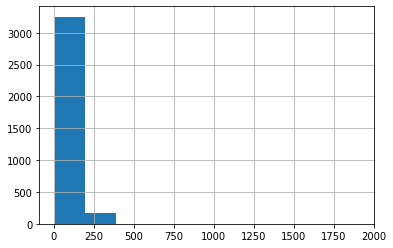

In [18]:
#以每平米租金作为因变量,并查看分布情况
df_model['y']=df_model.apply(lambda x:x['total_price']/x['area'] if x['area']>0 else 0,axis=1)
df_model['y'].hist()
plt.show()

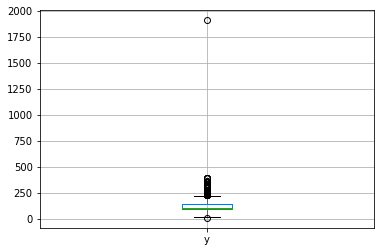

In [19]:
df_model[['y']].boxplot()

[]

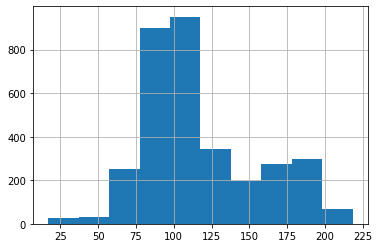

In [20]:
def boxplot_clean(df,colname):
    col=df[colname]
    iqr=col.quantile(0.75)-col.quantile(0.25)
    #根据iqr确定异常值阀值
    u_th =col.quantile(0.75)+1.5*iqr
    l_th =col.quantile(0.25)-1.5*iqr
    #删除异常值
    return (df.loc[(df[colname]>l_th)&(df[colname]<u_th),:].reset_index(drop=True))  #drop=True：在原有的索引列重置索引，不再另外添加新列。
boxplot_clean(df_model,'y').y.hist().plot()


In [21]:
df_model =boxplot_clean(df_model,'y')
df_model.head()
#df_model = df_model.drop(columns=['total_price','address','sub_station']).fillna(0)
df_model.drop(columns=['total_price','area','address','sub_station'],inplace=True)


In [22]:
df_model.fillna(0)



,is_nan,room,hall,sub_dist,bus_dist,便利店数目,sub_line_1,sub_line_10,sub_line_13,sub_line_14,...,bus_station_洼里,bus_station_润泽庄园小区,bus_station_清林路,bus_station_清河营中街东口,bus_station_百子湾南二路西口,bus_station_科荟南路西口,bus_station_窑洼湖桥东,bus_station_老年公寓,bus_station_龙祥嘉园,y
0,1,3.0,1.0,795.0,633.0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,122.535211
1,1,1.0,1.0,795.0,633.0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,112.000000
2,1,2.0,0.0,118800.0,764.0,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,100.000000
3,1,3.0,1.0,552.0,651.0,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,110.344828
4,1,1.0,1.0,324.0,558.0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,124.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3331,0,1.0,1.0,564.0,730.0,12,0,0,0,0,...,0,0,0,0,0,0,0,0,0,171.052632
3332,0,1.0,1.0,564.0,730.0,12,0,0,0,0,...,0,0,0,0,0,0,0,0,0,189.655172
3333,1,1.0,0.0,564.0,730.0,12,0,0,0,0,...,0,0,0,0,0,0,0,0,0,181.034483
3334,0,3.0,2.0,443.0,499.0,6,0,1,0,0,...,0,0,0,0,0,0,0,0,0,153.409091


In [23]:
#划分数据集
training,testing=train_test_split(df_model,test_size=0.2,random_state=1)


In [24]:
#划分自变量与因变量
x_train=training.copy().drop(columns=['y']).fillna(0)
x_test=testing.copy().drop(columns=['y']).fillna(0)
y_train=training.copy()['y']
y_test=testing.copy()['y']
features=x_train.columns.to_list()

In [25]:
#定义lasso
pipe_lasso=Pipeline([
    ('poly',PolynomialFeatures(degree=2)),
    ('sc',StandardScaler()),
    ('pwt',PowerTransformer('yeo-johnson')),
    ('lass_regr',LassoCV(alphas=(list(np.arange(1, 11) * 0.1) +
                list(np.arange(1, 20)) +
                list(np.arange(1, 10) * 10)),cv=KFold(n_splits=3,shuffle=True),n_jobs=-1)
     )])
#训练模型
pipe_lasso.fit(x_train,y_train)
print('ok')

ok


In [26]:
current_path=os.getcwd()
lasso_path=os.path.join(current_path,'lasso_model.pkl')
joblib.dump({'model_name':'lasso_model','feature_list':features,
            'modell':pipe_lasso
            },lasso_path)
#保存模型及训练数据


['C:\\Users\\Surface\\未命名\\北京租金预测\\lasso_model.pkl']

In [27]:
# 定义一个计算mape的函数
def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
y_test_predict = pipe_lasso.predict(x_test)
print(mean_absolute_error(y_test, y_test_predict))
print(mape(y_test.astype(float), y_test_predict))

13.918381310175775
14.87593095055891


In [28]:
#使用xgb模型
xgb_model = xgb.XGBRegressor(objective='reg:linear',
                             nthread=8, n_jobs=-1,
                             booster='gbtree', n_estimators=2000,
                             learning_rate=0.05, max_depth=9,
                             colsample_bylevel=1, colsample_bynode=1,
                             colsample_bytree=0.8, base_score=0.5,
                             eval_metric='mae', gamma=0, missing=-999,
                             min_child_weight=11, max_delta_step=0,
                             random_state=0, reg_alpha=0, reg_lambda=1,
                             scale_pos_weight=1, seed=1337, silent=1,
                             subsample=1, verbosity=1)

pipe_xgb = Pipeline([
        ('sc',StandardScaler()),
        ('xgb_rg', xgb_model)
        ])
pipe_xgb.fit(x_train, y_train)
print('done')

done


In [29]:
y_test_predict = pipe_xgb.predict(x_test)
print(mean_absolute_error(y_test, y_test_predict))
def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape(y_test.astype(float), y_test_predict)
print(mape(y_test.astype(float), y_test_predict))

9.653743779350753
9.53293102706388


In [30]:
#做一个简单的集成学习，利用lasso的预测值构建新的特征
training['ensemble_lasso'] = pipe_lasso.predict(training.loc[:,features])
testing['ensemble_lasso'] = pipe_lasso.predict(testing.loc[:,features])
x_train = training.copy().drop(columns=[ 'y'])
y_train = training.copy()['y']
x_test = testing.copy().drop(columns=[ 'y'])
y_test = testing.copy()['y']
features=x_train.columns

In [31]:
# 训练新的XGBOOST模型
pipe_xgb.fit(x_train, y_train)
print('done')

done


In [32]:
# 查看模型的表现
y_test_predict = pipe_xgb.predict(x_test)
print(mean_absolute_error(y_test, y_test_predict))
print(mape(y_test.astype(float), y_test_predict))

9.665941154758654
9.49680928526806


In [41]:
im=pipe_xgb[-1].feature_importances_
importance_table=pd.DataFrame({'features':features,'importance':im})
importance_table.sort_values(by='importance',ascending=False)


,features,importance
25,bus_station_呼家楼西,0.585994
12,sub_line_6,0.230958
30,bus_station_地铁柳芳站,0.044110
22,bus_station_北苑家园西站,0.025470
53,ensemble_lasso,0.023725
39,bus_station_安贞桥西,0.021369
38,bus_station_安贞桥北,0.009997
3,sub_dist,0.008769
44,bus_station_洼里,0.006522
32,bus_station_大郊亭桥东,0.006159
